Credit-Card Fraud Detection Feature Engineering
===============================================

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# check the statistical description of features in the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### plot the correlation betweeen features to get the relation between Dependent and Independent features

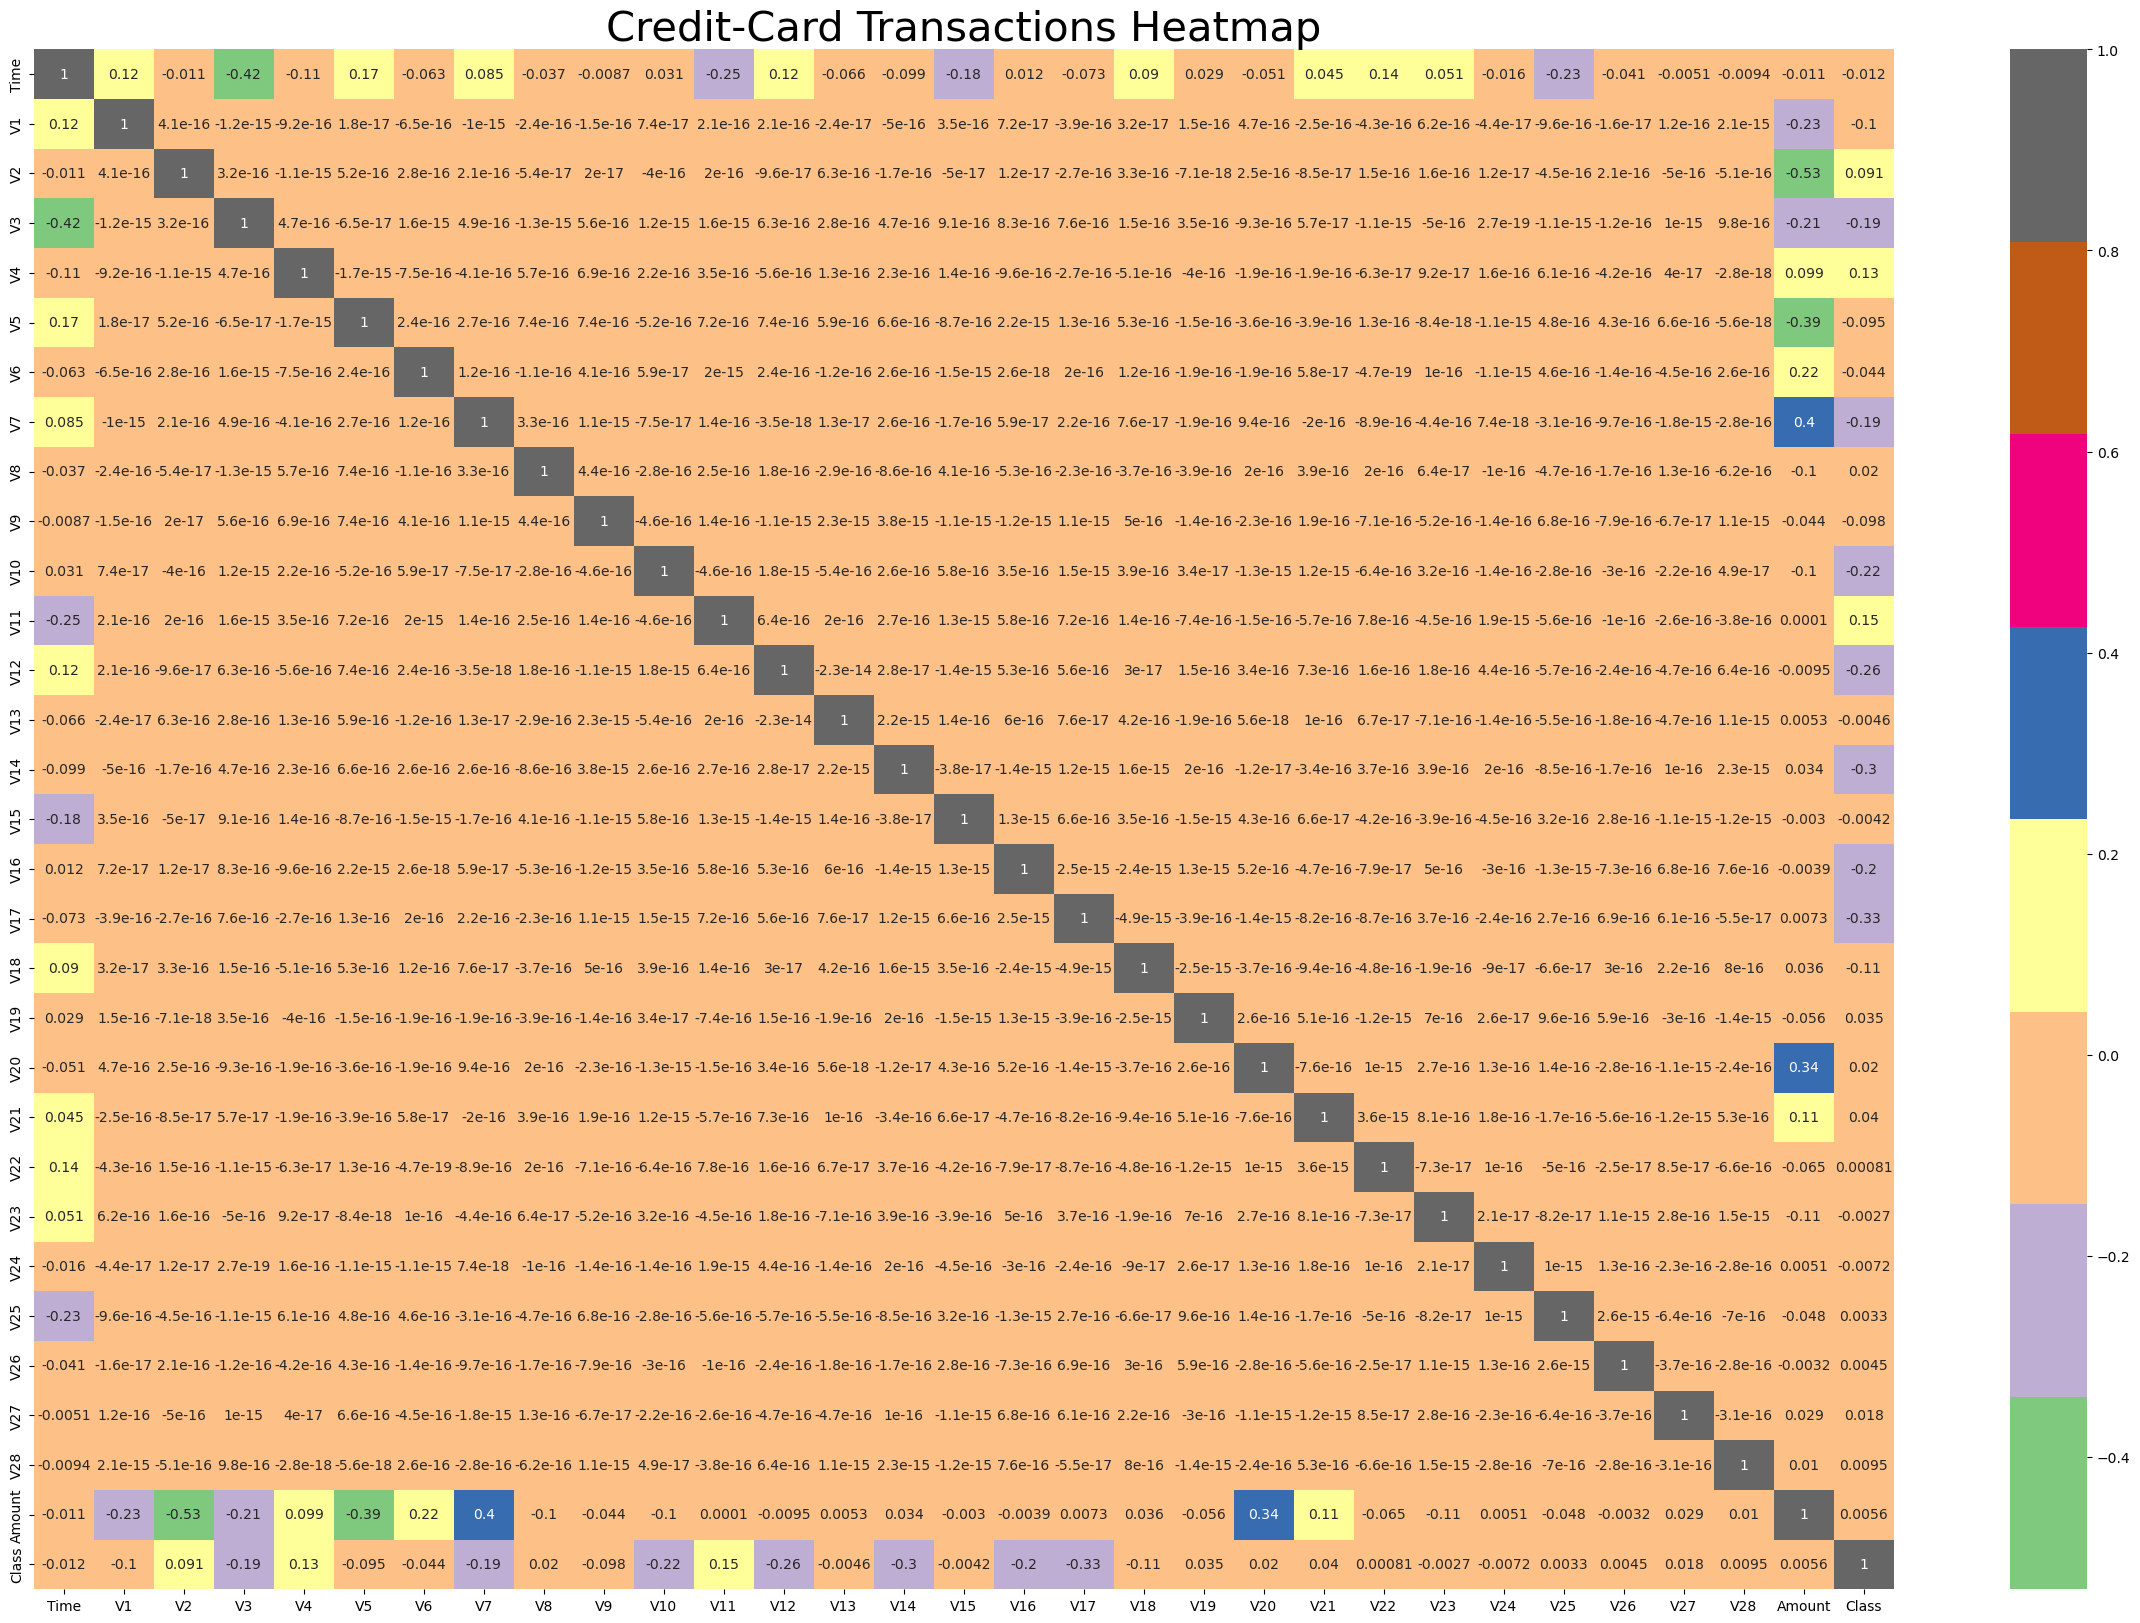

In [7]:
corr = df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Accent)

plt.title("Credit-Card Transactions Heatmap", fontsize=30)
plt.show()

from the EDA, the best features are **V12, V14, V17** cos of their relatively strong relationship with the target feature

however, in order to increase the number of features used for modeling, I'll select the independent features with correlation greater than *0.12* with the target; these are --> **V17, V14, V12, V10, V16, V7, V3, V11, V4**

#### Select K-Best Independent Features

I'll also try the _SelectKBest_ algorithm in the _sklearn_ library for selecting the best features for the model

In [5]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [6]:
# create copy of data
df_copy = df.copy()

# seperate to dependent & independent features
X = df_copy.iloc[:, :-1]
y = df_copy.iloc[:, -1]

# carry out a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [7]:
print("COMPLETE DATA\n", y.value_counts())
print()
print("TRAIN DATA\n", y_train.value_counts())
print()
print("TEST DATA\n", y_test.value_counts())

COMPLETE DATA
 Class
0    284315
1       492
Name: count, dtype: int64

TRAIN DATA
 Class
0    190487
1       333
Name: count, dtype: int64

TEST DATA
 Class
0    93828
1      159
Name: count, dtype: int64


in order to conduct optimal feature engineering, _I need to train models at almost every instance_
maybe, 
- train a model after scaling;
- train a model after balancing the data;
- comparing the results to get a _good enough_ model

In [8]:
# using SelectKBest requires scaling the data to be all +ve, in this case between 0 & 1
minmax_scaler = MinMaxScaler()

X_minmax = minmax_scaler.fit_transform(X_train)
X_minmax = pd.DataFrame(X_minmax, columns=minmax_scaler.get_feature_names_out())

In [9]:
k_best = SelectKBest(score_func=chi2, k=8)
fit = k_best.fit(X_minmax, y_train)

feature_scores = pd.DataFrame({"Features": X.columns, "Scores": fit.scores_})
feature_scores.sort_values("Scores", ascending=False, inplace=True)
best_features = feature_scores["Features"][:8].tolist()

In [10]:
X_best = X_minmax[best_features]

In [11]:
X_best.head()

,V11,V4,V14,V12,V17,V16,V18,V10
0,0.240232,0.308907,0.632565,0.726543,0.741112,0.451542,0.647278,0.610726
1,0.242864,0.133066,0.642402,0.716126,0.723219,0.454832,0.587513,0.607998
2,0.281535,0.276542,0.648177,0.735943,0.734269,0.457655,0.608502,0.613607
3,0.316492,0.310778,0.607136,0.693911,0.792382,0.456977,0.661411,0.598232
4,0.249535,0.223763,0.643931,0.669436,0.764793,0.478168,0.554337,0.633880


In [13]:
feature_scores.head(8)

,Features,Scores
11,V11,62.387085
4,V4,55.220753
14,V14,28.947526
12,V12,27.509502
17,V17,22.162088
16,V16,13.633685
18,V18,13.216816
10,V10,11.165215


the features with the highest scores are more related to the target class and will be chosen for the model

in this case, there is **V11, V4, V14, V12, V17, V16, V18, V10** as the _top 8_

these are almost same features as with the correlation matrix and this affirms the previous decision

In [14]:
from sklearn.metrics import classification_report

Basic Modeling
--------------
few samples to play with:
- LogisticRegression
- RandomForestClassifier
- GradientBoostingClassifier
- LinearSVC

##### train & test sets

In [16]:
def get_scaled_data(scaler, df, features=None):
    scaled_array = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled_array, columns=scaler.get_feature_names_out())

    if features is not None:
        return scaled_df[features]
    return scaled_df

In [17]:
# ALL features UNSCALED
X_train1 = X_train.copy()
X_test1 = X_test.copy()

# TOP features UNSCALED
X_train2 = X_train[best_features]
X_test2 = X_test[best_features]

# ALL features SCALED
X_train3 = X_minmax.copy()
X_test3 = get_scaled_data(minmax_scaler, X_test)

# TOP features SCALED
X_train4 = X_minmax[best_features]
X_test4 = get_scaled_data(minmax_scaler, X_test, best_features)

#### LOGISTIC REGRESSION
------------------------------------------------------------
| DATA                    | PRECISION | RECALL  | F1-SCORE |
|-------------------------|-----------|---------|----------|
| UNSCALED (ALL FEAT.)    | 0.62 | 0.61 | 0.62 |
| UNSCALED (TOP FEAT.)    | 0.88 | 0.53 | 0.66 |
| SCALED (ALL FEAT.)    | 0.89 | 0.47 | 0.62 |
| SCALED (TOP FEAT.)    | 0.88 | 0.46 | 0.60 |
            

In [18]:
from sklearn.linear_model import LogisticRegression

###### training _UNSCALED_ data with _ALL FEATURES_

training with the unscaled data using all the features recommends that I increase the number of iterations to help the model converge

In [19]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()

lr_model1 = LogisticRegression()
lr_model1.fit(X_train1, y_train)

C:\Users\salva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# classification report for train-set
print(classification_report(y_train, lr_model1.predict(X_train1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.70      0.68      0.69       333

    accuracy                           1.00    190820
   macro avg       0.85      0.84      0.85    190820
weighted avg       1.00      1.00      1.00    190820



In [21]:
# classification report for test-set
print(classification_report(y_test, lr_model1.predict(X_test1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.62      0.61      0.62       159

    accuracy                           1.00     93987
   macro avg       0.81      0.80      0.81     93987
weighted avg       1.00      1.00      1.00     93987



###### training _UNSCALED_ data with _TOP FEATURES_

In [22]:
X_train2 = X_train[best_features]
X_test2 = X_test[best_features]

lr_model2 = LogisticRegression()
lr_model2.fit(X_train2, y_train)

LogisticRegression()

In [23]:
# classification report for train-set
print(classification_report(y_train, lr_model2.predict(X_train2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.86      0.60      0.71       333

    accuracy                           1.00    190820
   macro avg       0.93      0.80      0.85    190820
weighted avg       1.00      1.00      1.00    190820



In [24]:
# classification report for test-set
print(classification_report(y_test, lr_model2.predict(X_test2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.88      0.53      0.66       159

    accuracy                           1.00     93987
   macro avg       0.94      0.76      0.83     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _ALL FEATURES_

In [25]:
X_train3 = X_minmax.copy()
X_test3 = get_scaled_data(minmax_scaler, X_test)

lr_model3 = LogisticRegression()
lr_model3.fit(X_train3, y_train)

LogisticRegression()

In [26]:
# classification report for train-set
print(classification_report(y_train, lr_model3.predict(X_train3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.86      0.53      0.66       333

    accuracy                           1.00    190820
   macro avg       0.93      0.77      0.83    190820
weighted avg       1.00      1.00      1.00    190820



In [27]:
# classification report for test-set
print(classification_report(y_test, lr_model3.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.89      0.47      0.62       159

    accuracy                           1.00     93987
   macro avg       0.95      0.74      0.81     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _TOP FEATURES_

In [28]:
X_train4 = X_minmax[best_features]
X_test4 = get_scaled_data(minmax_scaler, X_test, best_features)

lr_model4 = LogisticRegression()
lr_model4.fit(X_train4, y_train)

LogisticRegression()

In [29]:
# classification report for train-set
print(classification_report(y_train, lr_model4.predict(X_train4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.85      0.53      0.65       333

    accuracy                           1.00    190820
   macro avg       0.93      0.76      0.83    190820
weighted avg       1.00      1.00      1.00    190820



In [30]:
# classification report for test-set
print(classification_report(y_test, lr_model4.predict(X_test4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.88      0.46      0.60       159

    accuracy                           1.00     93987
   macro avg       0.94      0.73      0.80     93987
weighted avg       1.00      1.00      1.00     93987



#### RANDOM FOREST
------------------------------------------------------------
| DATA                    | PRECISION | RECALL  | F1-SCORE |
|-------------------------|-----------|---------|----------|
| UNSCALED (ALL FEAT.)    | 0.95 | 0.72 | 0.82 |
| UNSCALED (TOP FEAT.)    | 0.95 | 0.76 | 0.85 |
| SCALED (ALL FEAT.)    | 0.96 | 0.72 | 0.82 |
| SCALED (TOP FEAT.)    | 0.97 | 0.76 | 0.85 |
            

In [31]:
from sklearn.ensemble import RandomForestClassifier

###### training _UNSCALED_ data with _ALL FEATURES_

In [32]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(X_train1, y_train)

RandomForestClassifier()

In [33]:
# classification report for train-set
print(classification_report(y_train, rf_model1.predict(X_train1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       1.00      1.00      1.00       333

    accuracy                           1.00    190820
   macro avg       1.00      1.00      1.00    190820
weighted avg       1.00      1.00      1.00    190820



In [34]:
# classification report for test-set
print(classification_report(y_test, rf_model1.predict(X_test1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.95      0.72      0.82       159

    accuracy                           1.00     93987
   macro avg       0.97      0.86      0.91     93987
weighted avg       1.00      1.00      1.00     93987



###### training _UNSCALED_ data with _TOP FEATURES_

In [35]:
rf_model2 = RandomForestClassifier()
rf_model2.fit(X_train2, y_train)

RandomForestClassifier()

In [36]:
# classification report for train-set
print(classification_report(y_train, rf_model2.predict(X_train2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       1.00      1.00      1.00       333

    accuracy                           1.00    190820
   macro avg       1.00      1.00      1.00    190820
weighted avg       1.00      1.00      1.00    190820



In [37]:
# classification report for test-set
print(classification_report(y_test, rf_model2.predict(X_test2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.95      0.76      0.85       159

    accuracy                           1.00     93987
   macro avg       0.98      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _ALL FEATURES_

In [38]:
rf_model3 = RandomForestClassifier()
rf_model3.fit(X_train3, y_train)

RandomForestClassifier()

In [39]:
# classification report for train-set
print(classification_report(y_train, rf_model3.predict(X_train3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       1.00      1.00      1.00       333

    accuracy                           1.00    190820
   macro avg       1.00      1.00      1.00    190820
weighted avg       1.00      1.00      1.00    190820



In [40]:
# classification report for test-set
print(classification_report(y_test, rf_model3.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.96      0.72      0.82       159

    accuracy                           1.00     93987
   macro avg       0.98      0.86      0.91     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _TOP FEATURES_

In [41]:
rf_model4 = RandomForestClassifier()
rf_model4.fit(X_train4, y_train)

RandomForestClassifier()

In [42]:
# classification report for train-set
print(classification_report(y_train, rf_model4.predict(X_train4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       1.00      1.00      1.00       333

    accuracy                           1.00    190820
   macro avg       1.00      1.00      1.00    190820
weighted avg       1.00      1.00      1.00    190820



In [43]:
# classification report for test-set
print(classification_report(y_test, rf_model4.predict(X_test4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.97      0.76      0.85       159

    accuracy                           1.00     93987
   macro avg       0.98      0.88      0.93     93987
weighted avg       1.00      1.00      1.00     93987



#### GRADIENT BOOSTING
------------------------------------------------------------
| DATA                    | PRECISION | RECALL  | F1-SCORE |
|-------------------------|-----------|---------|----------|
| UNSCALED (ALL FEAT.)    | 0.70 | 0.28 | 0.40 |
| UNSCALED (TOP FEAT.)    | 0.76 | 0.72 | 0.74 |
| SCALED (ALL FEAT.)    | 0.70 | 0.28 | 0.40 |
| SCALED (TOP FEAT.)    | 0.78 | 0.77 | 0.78 |

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

###### training _UNSCALED_ data with _ALL FEATURES_

In [46]:
gbc_model1 = GradientBoostingClassifier()
gbc_model1.fit(X_train1, y_train)

GradientBoostingClassifier()

In [47]:
# classification report for train-set
print(classification_report(y_train, gbc_model1.predict(X_train1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.77      0.23      0.36       333

    accuracy                           1.00    190820
   macro avg       0.88      0.62      0.68    190820
weighted avg       1.00      1.00      1.00    190820



In [48]:
# classification report for test-set
print(classification_report(y_test, gbc_model1.predict(X_test1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.70      0.28      0.40       159

    accuracy                           1.00     93987
   macro avg       0.85      0.64      0.70     93987
weighted avg       1.00      1.00      1.00     93987



###### training _UNSCALED_ data with _TOP FEATURES_

In [49]:
gbc_model2 = GradientBoostingClassifier()
gbc_model2.fit(X_train2, y_train)

GradientBoostingClassifier()

In [50]:
# classification report for train-set
print(classification_report(y_train, gbc_model2.predict(X_train2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.78      0.77      0.78       333

    accuracy                           1.00    190820
   macro avg       0.89      0.89      0.89    190820
weighted avg       1.00      1.00      1.00    190820



In [51]:
# classification report for test-set
print(classification_report(y_test, gbc_model2.predict(X_test2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.76      0.72      0.74       159

    accuracy                           1.00     93987
   macro avg       0.88      0.86      0.87     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _ALL FEATURES_

In [52]:
gbc_model3 = GradientBoostingClassifier()
gbc_model3.fit(X_train3, y_train)

GradientBoostingClassifier()

In [53]:
# classification report for train-set
print(classification_report(y_train, gbc_model3.predict(X_train3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.77      0.23      0.36       333

    accuracy                           1.00    190820
   macro avg       0.88      0.62      0.68    190820
weighted avg       1.00      1.00      1.00    190820



In [54]:
# classification report for test-set
print(classification_report(y_test, gbc_model3.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.70      0.28      0.40       159

    accuracy                           1.00     93987
   macro avg       0.85      0.64      0.70     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _TOP FEATURES_

In [55]:
gbc_model4 = GradientBoostingClassifier()
gbc_model4.fit(X_train4, y_train)

GradientBoostingClassifier()

In [56]:
# classification report for train-set
print(classification_report(y_train, gbc_model4.predict(X_train4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.78      0.77      0.78       333

    accuracy                           1.00    190820
   macro avg       0.89      0.89      0.89    190820
weighted avg       1.00      1.00      1.00    190820



In [57]:
# classification report for test-set
print(classification_report(y_test, gbc_model4.predict(X_test4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.78      0.72      0.75       159

    accuracy                           1.00     93987
   macro avg       0.89      0.86      0.87     93987
weighted avg       1.00      1.00      1.00     93987



#### LINEAR SVC
------------------------------------------------------------
| DATA                    | PRECISION | RECALL  | F1-SCORE |
|-------------------------|-----------|---------|----------|
| UNSCALED (ALL FEAT.)    | 0.86 | 0.04 | 0.07 |
| UNSCALED (TOP FEAT.)    | 0.90 | 0.57 | 0.69 |
| SCALED (ALL FEAT.)    | 0.91 | 0.54 | 0.68 |
| SCALED (TOP FEAT.)    | 0.89 | 0.51 | 0.65 |
            

In [58]:
from sklearn.svm import LinearSVC

###### training _UNSCALED_ data with _ALL FEATURES_

In [59]:
svc_model1 = LinearSVC()
svc_model1.fit(X_train1, y_train)

C:\Users\salva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [60]:
# classification report for train-set
print(classification_report(y_train, svc_model1.predict(X_train1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.56      0.03      0.06       333

    accuracy                           1.00    190820
   macro avg       0.78      0.51      0.53    190820
weighted avg       1.00      1.00      1.00    190820



In [61]:
# classification report for test-set
print(classification_report(y_test, svc_model1.predict(X_test1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.86      0.04      0.07       159

    accuracy                           1.00     93987
   macro avg       0.93      0.52      0.54     93987
weighted avg       1.00      1.00      1.00     93987



###### training _UNSCALED_ data with _TOP FEATURES_

In [62]:
svc_model2 = LinearSVC()
svc_model2.fit(X_train2, y_train)

C:\Users\salva\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [63]:
# classification report for train-set
print(classification_report(y_train, svc_model2.predict(X_train2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.86      0.62      0.72       333

    accuracy                           1.00    190820
   macro avg       0.93      0.81      0.86    190820
weighted avg       1.00      1.00      1.00    190820



In [64]:
# classification report for test-set
print(classification_report(y_test, svc_model2.predict(X_test2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.90      0.57      0.69       159

    accuracy                           1.00     93987
   macro avg       0.95      0.78      0.85     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _ALL FEATURES_

In [65]:
svc_model3 = LinearSVC()
svc_model3.fit(X_train3, y_train)

LinearSVC()

In [66]:
# classification report for train-set
print(classification_report(y_train, svc_model3.predict(X_train3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.87      0.59      0.70       333

    accuracy                           1.00    190820
   macro avg       0.93      0.79      0.85    190820
weighted avg       1.00      1.00      1.00    190820



In [67]:
# classification report for test-set
print(classification_report(y_test, svc_model3.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.91      0.54      0.68       159

    accuracy                           1.00     93987
   macro avg       0.95      0.77      0.84     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _TOP FEATURES_

In [68]:
svc_model4 = LinearSVC()
svc_model4.fit(X_train4, y_train)

LinearSVC()

In [69]:
# classification report for train-set
print(classification_report(y_train, svc_model4.predict(X_train4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.86      0.57      0.68       333

    accuracy                           1.00    190820
   macro avg       0.93      0.78      0.84    190820
weighted avg       1.00      1.00      1.00    190820



In [70]:
# classification report for test-set
print(classification_report(y_test, svc_model4.predict(X_test4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.89      0.51      0.65       159

    accuracy                           1.00     93987
   macro avg       0.94      0.75      0.82     93987
weighted avg       1.00      1.00      1.00     93987



#### XGBOOST
------------------------------------------------------------
| DATA                    | PRECISION | RECALL  | F1-SCORE |
|-------------------------|-----------|---------|----------|
| UNSCALED (ALL FEAT.)    | 0.97 | 0.75 | 0.84 |
| UNSCALED (TOP FEAT.)    | 0.92 | 0.76 | 0.83 |
| SCALED (ALL FEAT.)    | 0.97 | 0.75 | 0.85 |
| SCALED (TOP FEAT.)    | 0.92 | 0.75 | 0.83 |
            

In [169]:
from xgboost import XGBClassifier

###### training _UNSCALED_ data with _ALL FEATURES_

In [170]:
xgb_model1 = XGBClassifier()
xgb_model1.fit(X_train1, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [171]:
# classification report for train-set
print(classification_report(y_train, xgb_model1.predict(X_train1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       1.00      1.00      1.00       333

    accuracy                           1.00    190820
   macro avg       1.00      1.00      1.00    190820
weighted avg       1.00      1.00      1.00    190820



In [172]:
# classification report for test-set
print(classification_report(y_test, xgb_model1.predict(X_test1), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.97      0.75      0.84       159

    accuracy                           1.00     93987
   macro avg       0.98      0.87      0.92     93987
weighted avg       1.00      1.00      1.00     93987



###### training _UNSCALED_ data with _TOP FEATURES_

In [173]:
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [174]:
# classification report for train-set
print(classification_report(y_train, xgb_model2.predict(X_train2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.92      1.00      0.96       333

    accuracy                           1.00    190820
   macro avg       0.96      1.00      0.98    190820
weighted avg       1.00      1.00      1.00    190820



In [175]:
# classification report for test-set
print(classification_report(y_test, xgb_model2.predict(X_test2), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.92      0.76      0.83       159

    accuracy                           1.00     93987
   macro avg       0.96      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _ALL FEATURES_

In [176]:
xgb_model3 = XGBClassifier()
xgb_model3.fit(X_train3, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [177]:
# classification report for train-set
print(classification_report(y_train, xgb_model3.predict(X_train3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       1.00      1.00      1.00       333

    accuracy                           1.00    190820
   macro avg       1.00      1.00      1.00    190820
weighted avg       1.00      1.00      1.00    190820



In [178]:
# classification report for test-set
print(classification_report(y_test, xgb_model3.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.97      0.75      0.85       159

    accuracy                           1.00     93987
   macro avg       0.98      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



###### training _SCALED_ data with _TOP FEATURES_

In [179]:
xgb_model4 = XGBClassifier()
xgb_model4.fit(X_train4, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [180]:
# classification report for train-set
print(classification_report(y_train, xgb_model4.predict(X_train4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       0.92      0.99      0.96       333

    accuracy                           1.00    190820
   macro avg       0.96      1.00      0.98    190820
weighted avg       1.00      1.00      1.00    190820



In [181]:
# classification report for test-set
print(classification_report(y_test, xgb_model4.predict(X_test4), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.92      0.75      0.83       159

    accuracy                           1.00     93987
   macro avg       0.96      0.88      0.91     93987
weighted avg       1.00      1.00      1.00     93987



#### Observations
- Logisitic regression performs best when trained on `Unscaled data using the Top features`
- Random forest performs best when trained on `Scaled data using the Top features`
- Gradient boosting classifier performs best when trained on `Scaled data using the Top features`
- Linear SVC performs best when trained on `Unscaled data using the Top features`
- XGBoost performs best when trained on `Scaled data using All the features`

The best models are the `RandomForest` and `XGBoost` models

Handling Imbalanced Data
------------------------
this is to reduce overfitting & underfitting 

this data is highly imbalanced and one can choose to:
1. under-sample the majority class
2. over-sample the minority class by duplication
3. over-sample the minority class using Synthetic Minority Oversampling Technique (SMOTE)

In [186]:
X_minmax.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.455727,0.977863,0.767075,0.946370,0.308907,0.759213,0.261007,0.262041,0.786217,0.599925,...,0.578990,0.560516,0.512073,0.619274,0.433911,0.562317,0.358619,0.240175,0.313910,0.000389
1,0.506846,0.937026,0.782256,0.928674,0.133066,0.768510,0.247263,0.273621,0.782676,0.588589,...,0.583510,0.555588,0.473846,0.617949,0.389280,0.540946,0.487712,0.251565,0.320191,0.000195
2,0.252257,0.979625,0.770488,0.931857,0.276542,0.762992,0.253250,0.266122,0.782630,0.560045,...,0.579936,0.557522,0.478644,0.621505,0.436775,0.551484,0.440354,0.237825,0.313558,0.000175
3,0.316924,0.978188,0.773992,0.916987,0.310778,0.766080,0.253206,0.266553,0.784416,0.563088,...,0.578322,0.561056,0.509960,0.618641,0.415761,0.570368,0.373883,0.239550,0.314260,0.000039
4,0.945918,0.990317,0.752756,0.908328,0.223763,0.756134,0.251669,0.261367,0.783213,0.567505,...,0.581761,0.566313,0.537190,0.621485,0.429436,0.518266,0.391273,0.237599,0.312562,0.005683


In [182]:
y_train.value_counts()

Class
0    190487
1       333
Name: count, dtype: int64

#### 1. under-sampling majority class

In [183]:
from imblearn.under_sampling import RandomUnderSampler

In [187]:
under_sampler = RandomUnderSampler(random_state=21)
X_under, y_under = under_sampler.fit_resample(X_minmax, y_train)

In [188]:
y_under.value_counts()

Class
0    333
1    333
Name: count, dtype: int64

#### _train a XGBoost model with an under-sampled dataset_

In [190]:
xgb_under = XGBClassifier()
xgb_under.fit(X_under, y_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [191]:
# classification report for train-set
print(classification_report(y_under, xgb_under.predict(X_under), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00       333
       Fraud       1.00      1.00      1.00       333

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666



In [196]:
# classification report for test-set
print(classification_report(y_test, xgb_under.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     93828
       Fraud       0.05      0.89      0.10       159

    accuracy                           0.97     93987
   macro avg       0.53      0.93      0.54     93987
weighted avg       1.00      0.97      0.99     93987



#### _train a RandomForest model with an under-sampled dataset_

In [199]:
rf_under = RandomForestClassifier()
rf_under.fit(X_under, y_under)

RandomForestClassifier()

In [200]:
# classification report for train-set
print(classification_report(y_under, rf_under.predict(X_under), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00       333
       Fraud       1.00      1.00      1.00       333

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666



In [201]:
# classification report for test-set
print(classification_report(y_test, rf_under.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     93828
       Fraud       0.07      0.89      0.13       159

    accuracy                           0.98     93987
   macro avg       0.54      0.94      0.56     93987
weighted avg       1.00      0.98      0.99     93987



#### 2. over-sampling minority class by DUPLICATION

In [202]:
from imblearn.over_sampling import RandomOverSampler

In [204]:
over_sampler = RandomOverSampler(random_state=21)

X_over, y_over = over_sampler.fit_resample(X_minmax, y_train)

In [205]:
y_over.value_counts()

Class
0    190487
1    190487
Name: count, dtype: int64

#### _train an XGBoost model with an over-sampled dataset_

In [206]:
xgb_over = XGBClassifier()
xgb_over.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [207]:
# classification report for train-set
print(classification_report(y_over, xgb_over.predict(X_over), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       1.00      1.00      1.00    190487

    accuracy                           1.00    380974
   macro avg       1.00      1.00      1.00    380974
weighted avg       1.00      1.00      1.00    380974



In [208]:
# classification report for test-set
print(classification_report(y_test, xgb_over.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.93      0.77      0.85       159

    accuracy                           1.00     93987
   macro avg       0.97      0.89      0.92     93987
weighted avg       1.00      1.00      1.00     93987



#### _train a RandomForest model with an over-sampled dataset_

In [209]:
rf_over = RandomForestClassifier()
rf_over.fit(X_over, y_over)

RandomForestClassifier()

In [ ]:
# classification report for train-set
print(classification_report(y_over, rf_over.predict(X_over), target_names=["Not Fraud", "Fraud"]))

In [210]:
# classification report for test-set
print(classification_report(y_test, rf_over.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.94      0.74      0.83       159

    accuracy                           1.00     93987
   macro avg       0.97      0.87      0.91     93987
weighted avg       1.00      1.00      1.00     93987



#### 3. oversampling minority class using SMOTE

In [211]:
from imblearn.over_sampling import SMOTE

In [219]:
smote_sampler = SMOTE(sampling_strategy="minority")

X_smote, y_smote = smote_sampler.fit_resample(X_minmax, y_train)

In [220]:
y_smote.value_counts()

Class
0    190487
1    190487
Name: count, dtype: int64

#### _train an XGBoost model with a smote-sampled dataset_

In [221]:
xgb_smote = XGBClassifier()
xgb_smote.fit(X_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [222]:
# classification report for train-set
print(classification_report(y_smote, xgb_smote.predict(X_smote), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       1.00      1.00      1.00    190487

    accuracy                           1.00    380974
   macro avg       1.00      1.00      1.00    380974
weighted avg       1.00      1.00      1.00    380974



In [223]:
# classification report for test-set
print(classification_report(y_test, xgb_smote.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.78      0.82      0.80       159

    accuracy                           1.00     93987
   macro avg       0.89      0.91      0.90     93987
weighted avg       1.00      1.00      1.00     93987



#### _train a RandomForest model with a smote-sampled dataset_

In [224]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [225]:
# classification report for train-set
print(classification_report(y_smote, rf_smote.predict(X_smote), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    190487
       Fraud       1.00      1.00      1.00    190487

    accuracy                           1.00    380974
   macro avg       1.00      1.00      1.00    380974
weighted avg       1.00      1.00      1.00    380974



In [226]:
# classification report for test-set
print(classification_report(y_test, rf_smote.predict(X_test3), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     93828
       Fraud       0.86      0.77      0.81       159

    accuracy                           1.00     93987
   macro avg       0.93      0.88      0.91     93987
weighted avg       1.00      1.00      1.00     93987



Treating Outliers
-----------------
to identify outliers, it's either the:
1. sorting method
2. data visualization
3. statistical tests (z-scores)
4. interquartile-range method

In [22]:
X_train_best.describe()

,V11,V4,V14,V12,V17,V16,V18,V10
count,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000
mean,0.001476,-0.001442,-0.000752,-0.000107,-0.001591,-0.000296,0.001755,-0.000151
std,1.022464,1.415323,0.962198,1.002653,0.854342,0.878682,0.838529,1.091983
min,-4.797473,-5.600607,-19.214325,-18.683715,-23.241597,-14.129855,-9.498746,-24.588262
25%,-0.761436,-0.847903,-0.424856,-0.404347,-0.484759,-0.469252,-0.497709,-0.535961
50%,-0.030470,-0.020810,0.050219,0.141677,-0.067741,0.066408,-0.001644,-0.091936
75%,0.740930,0.739895,0.492900,0.618811,0.399952,0.523179,0.502585,0.455742
max,12.018913,16.875344,10.526766,7.848392,7.766636,17.315112,5.041069,15.331742


In [23]:
X_under.describe()

,V11,V4,V14,V12,V17,V16,V18,V10
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,1.978443,2.246478,-3.518027,-3.208480,-3.446166,-2.180003,-1.154842,-2.831164
std,2.764891,3.222132,4.727713,4.608642,5.956356,3.476497,2.397721,4.549878
min,-2.149492,-4.236221,-19.214325,-18.683715,-23.241597,-14.129855,-9.498746,-24.588262
25%,-0.149703,-0.233257,-6.812713,-5.726880,-5.514700,-3.830081,-1.833410,-4.720261
50%,1.170286,1.352612,-1.105255,-0.967230,-0.564563,-0.774567,-0.382853,-0.959982
75%,3.694327,4.398053,0.188050,0.168761,0.248359,0.237942,0.344656,0.040483
max,12.018913,11.885313,3.442422,1.860591,6.443649,2.493228,3.531250,8.845064


In [24]:
X_over.describe()

,V11,V4,V14,V12,V17,V16,V18,V10
count,380974.000000,380974.000000,380974.000000,380974.000000,380974.000000,380974.000000,380974.000000,380974.000000
mean,1.940235,2.275777,-3.518648,-3.190278,-3.451793,-2.126753,-1.164026,-2.862704
std,2.787668,3.167765,4.721789,4.609465,5.955366,3.504663,2.381491,4.507591
min,-4.797473,-5.600607,-19.214325,-18.683715,-23.241597,-14.129855,-9.498746,-24.588262
25%,-0.178211,-0.119349,-6.826584,-5.694074,-5.522088,-3.836189,-1.850635,-4.723092
50%,1.120505,1.334439,-1.002822,-0.899344,-0.548543,-0.659061,-0.379483,-0.867912
75%,3.694711,4.333341,0.127284,0.196887,0.228306,0.305501,0.341238,0.022159
max,12.018913,16.875344,10.526766,7.848392,7.766636,17.315112,5.041069,15.331742


In [25]:
X_smote.describe()

,V11,V4,V14,V12,V17,V16,V18,V10
count,380974.000000,380974.000000,380974.000000,380974.000000,380974.000000,380974.000000,380974.000000,380974.000000
mean,1.946732,2.261567,-3.535904,-3.154842,-3.456394,-2.128015,-1.164238,-2.868262
std,2.777652,3.116077,4.712701,4.571602,5.936918,3.493206,2.361721,4.468039
min,-4.797473,-5.600607,-19.214325,-18.683715,-23.241597,-14.129855,-9.498746,-24.588262
25%,-0.174828,-0.096262,-6.790479,-5.594464,-5.379577,-3.680057,-1.869626,-4.730795
50%,1.123824,1.379701,-1.008289,-0.861188,-0.547353,-0.644012,-0.383927,-0.865502
75%,3.741858,4.223109,0.119721,0.186536,0.242733,0.297646,0.332934,0.020141
max,12.018913,16.875344,10.526766,7.848392,7.766636,17.315112,5.041069,15.331742


some outliers represent true values from natural variation in the population; other outliers result from incorrect data entry, equipment malfunction, or other measurement errors
- **true outliers** should be retained in the data as these just represent natural variations in the sample
- **other outliers** may come from errors and are unrepresentative

action on an outlier depends on its most likely cause
1. **sorting method:** sort these features from low to high and scan for _extremely low_ or _extremely high_ values
2. **using visualizations:** visualize data with a box-plot or box-&-whisker-plot to see the data distribution at a glance and highlight the data range
3. **statistical outlier detection:**
   - apply tests or procedures to identify extreme values and convert these _extremes_ to _z-scores_ to know how many std. deviations they are away from the mean
   - a value with a _high_ or _low_ enough _z-score_ can be considered an outlier; for a rule-of-thumb, `z-score < -3 || z-score > +3` is considered an outlier 

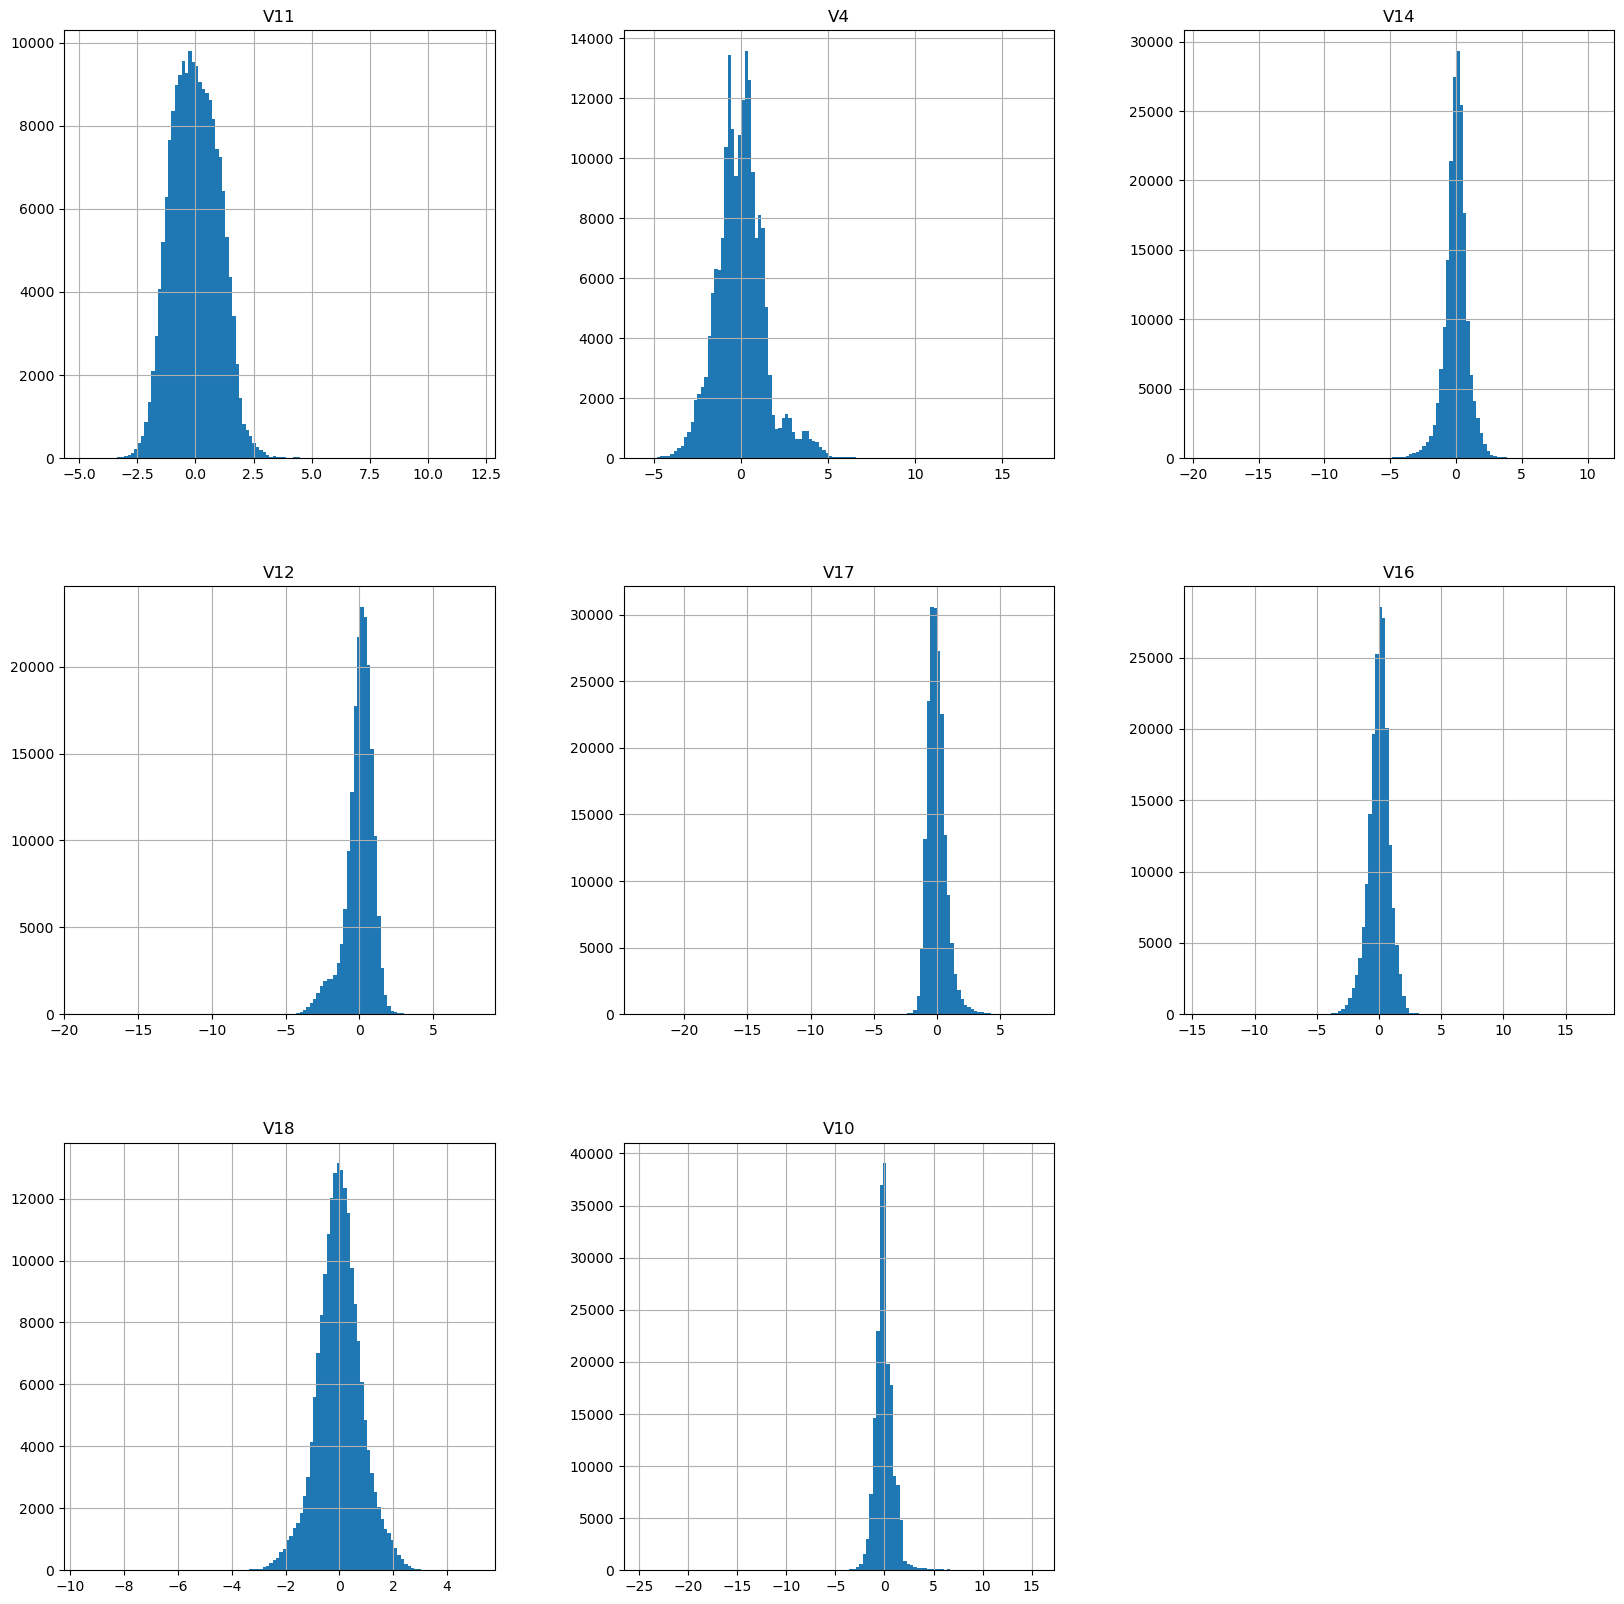

In [26]:
# using the Rice criterion to choose the optimal number of bins

X_train_best.hist(bins="rice", figsize=(20, 20))
plt.show()

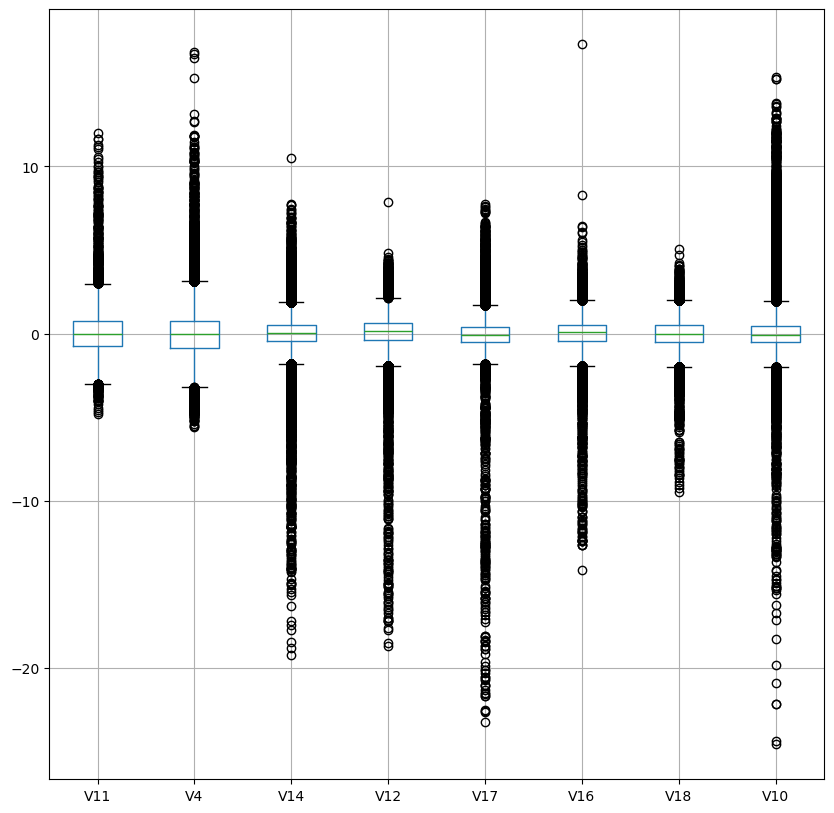

In [27]:
X_train_best.boxplot(figsize=(10, 10))
plt.show()

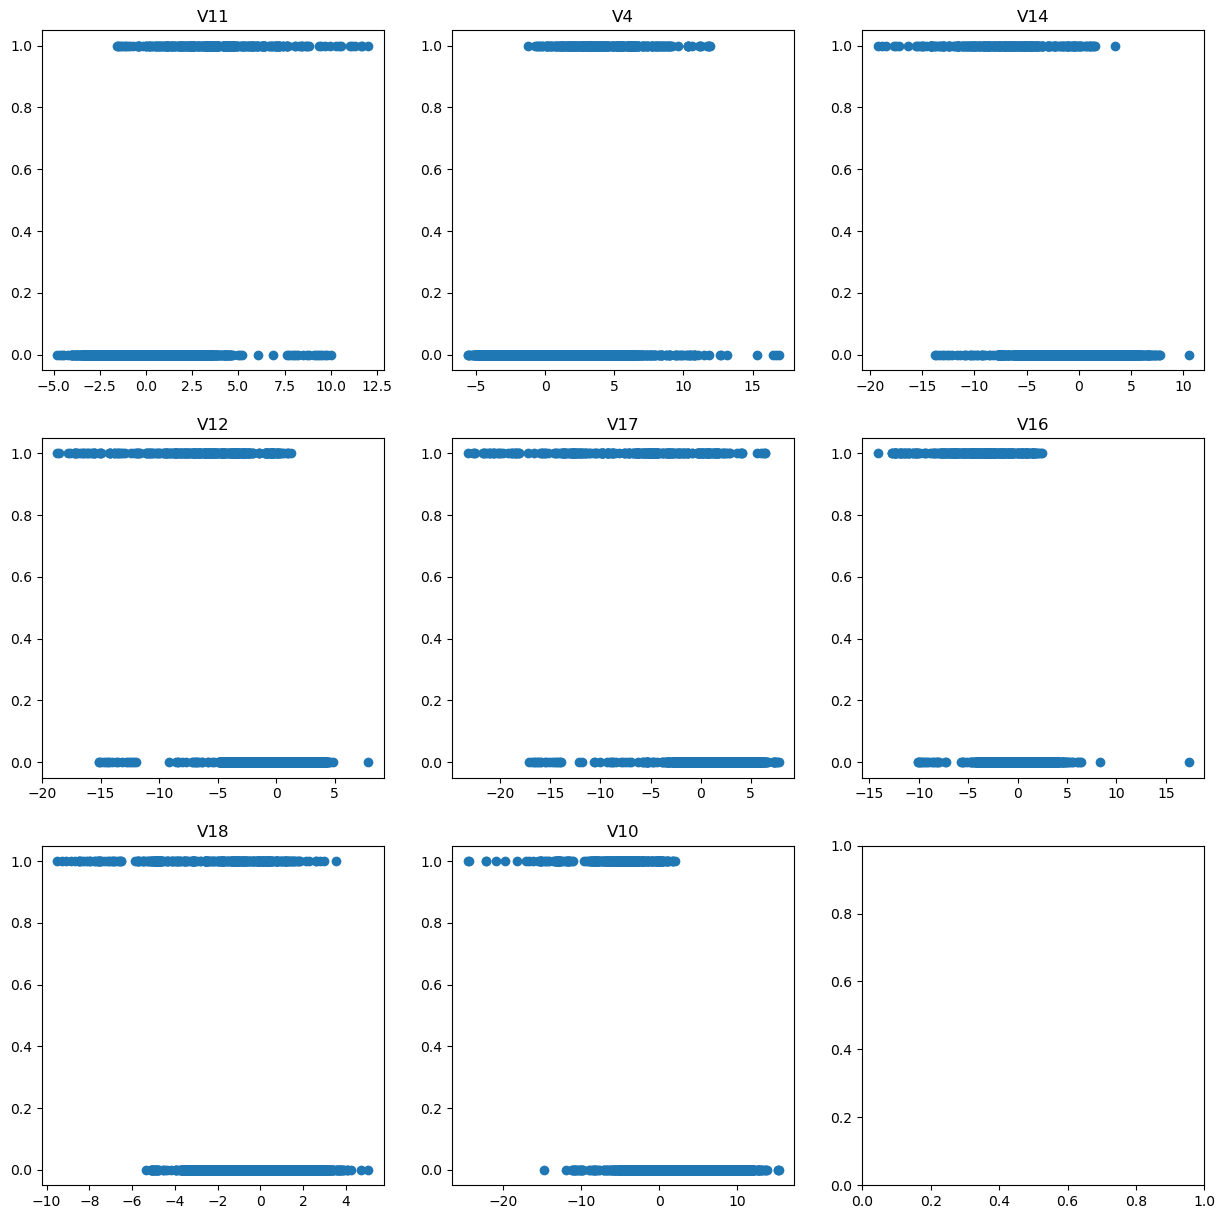

In [28]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

ax[0, 0].scatter(X_train_best["V11"], y_train)
ax[0, 0].set_title("V11")

ax[0, 1].scatter(X_train_best["V4"], y_train)
ax[0, 1].set_title("V4")

ax[0, 2].scatter(X_train_best["V14"], y_train)
ax[0, 2].set_title("V14")

ax[1, 0].scatter(X_train_best["V12"], y_train)
ax[1, 0].set_title("V12")

ax[1, 1].scatter(X_train_best["V17"], y_train)
ax[1, 1].set_title("V17")

ax[1, 2].scatter(X_train_best["V16"], y_train)
ax[1, 2].set_title("V16")

ax[2, 0].scatter(X_train_best["V18"], y_train)
ax[2, 0].set_title("V18")

ax[2, 1].scatter(X_train_best["V10"], y_train)
ax[2, 1].set_title("V10")

plt.show()

using the scatterplot reveals the outliers better

as the data doesn't generally follow a normal distribution, I can calculate the outlier data-points using the _IQR_ instead of the _Z-score_

with the IQR, the outlier datapoints are those that fall below `Q1 - 1.5IQR` or above `Q3 + 1.5IQR`
>_**Q1 is 25th percentile**_; _**Q3 is 75th percentile**_; _**IQR represents the InterQuartile Range**_

In [29]:
# function to find Outliers
def get_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    outliers = df[((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5*iqr)) )]

    return outliers

In [30]:
X_outliers = get_outliers(X_train_best)

In [31]:
X_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190820 entries, 128536 to 80841
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V11     539 non-null    float64
 1   V4      7579 non-null   float64
 2   V14     9504 non-null   float64
 3   V12     10310 non-null  float64
 4   V17     4946 non-null   float64
 5   V16     5486 non-null   float64
 6   V18     5012 non-null   float64
 7   V10     6351 non-null   float64
dtypes: float64(8)
memory usage: 13.1 MB


In [32]:
X_outliers.isnull().sum()

V11    190281
V4     183241
V14    181316
V12    180510
V17    185874
V16    185334
V18    185808
V10    184469
dtype: int64

- with the large number of the supposed outliers, it isn't advisable to remove or manipulate these values
- also, since this is a financial system, there may be information present about these transactions in these outliers

so therefore, I'll leave the outliers as they are

Conclusions
-----------
- I wouldn't say the feature engineering is complete. There will some steps which need to be optimized during modeling
- The technique for handling the data imbalance is undecided cos of the insignificant improvement using the various techniques.